In [1]:
getwd()
setwd("/liulab/galib/dlbcl_manuscript/")
library(tidyverse)
library(Seurat)
library(here)
library(harmony)
library(viridis)
library(RColorBrewer)
library(Polychrome)
PurpleAndYellow()
library(ComplexHeatmap)
library(devtools)
library(presto)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(ggrepel)
library("tidyverse")
library("readxl")
library(ggvenn)

[1] "/liulab/galib/dlbcl_manuscript/scripts/10_infercnv"

Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘forcats’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching SeuratObject

Attaching sp

here() starts at /liulab/galib/dlbcl_manuscript

Warning message:
“package ‘harmony’ was built under R version 4.1.3”
Loading required package: Rcpp

Warning message:
“package ‘Rcpp’ was built under R version 4.1.2”
Loading required package: viridisLite

Warning message:
“package ‘RColorBrewer

[1] "#FF00FF" "#F400F4" "#EA00EA" "#DF00DF" "#D500D5" "#CA00CA" "#BF00BF"
 [8] "#B500B5" "#AA00AA" "#9F009F" "#950095" "#8A008A" "#800080" "#750075"
[15] "#6A006A" "#600060" "#550055" "#4A004A" "#400040" "#350035" "#2B002B"
[22] "#200020" "#150015" "#0B000B" "#000000" "#000000" "#0B0B00" "#151500"
[29] "#202000" "#2B2B00" "#353500" "#404000" "#4A4A00" "#555500" "#606000"
[36] "#6A6A00" "#757500" "#808000" "#8A8A00" "#959500" "#9F9F00" "#AAAA00"
[43] "#B5B500" "#BFBF00" "#CACA00" "#D4D400" "#DFDF00" "#EAEA00" "#F4F400"
[50] "#FFFF00"

Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.1.3”
Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: usethis

Warning message:
“package ‘presto’ was built under R version 4.1.3”
Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The

In [2]:
B_cell<- readRDS("./data/objects/B_cell_inferCNV_positive_annotated.rds")

## number of cells with full-lengh VDJ

In [3]:
# B_cell_trus4<- read.table('./data/B_cell_metadata_trust4_results.tsv', header = TRUE, 
#                           sep = '\t', comment.char = "", quote = "")


# cells_with_cdr3<- B_cell_trus4  %>% filter(!is.na(cdr3aa))  %>% pull(barcode)
# length(cells_with_cdr3)

# Li_trust4<- read.table('./data/trust4_combined_barcoderep_filter.tsv', header = FALSE, sep = '\t', comment.char = "", quote = "")

# IGH<- Li_trust4   %>% filter(V2 == 'B')  %>% filter(V3 != "*")  %>% pull(V1)
# IGK<- Li_trust4   %>% filter(V2 == 'B')  %>% filter(V4 != "*")  %>% pull(V1)

# both <- intersect(IGH, IGK)

# rownames(B_cell@meta.data) %in% IGH  %>% table()
# rownames(B_cell@meta.data) %in% IGK  %>% table()

[1] 58676

In [43]:
cd3_pos_cd4_neg_trus4<- read.table('./data/cd3_pos_cd4_neg_metadata_trust4_results.tsv', header = TRUE, 
                          sep = '\t', comment.char = "", quote = "")

cd3_pos_cd8_neg_trus4<- read.table('./data/cd3_pos_cd8_neg_metadata_trust4_results.tsv', header = TRUE, 
                          sep = '\t', comment.char = "", quote = "")

In [44]:
cd3_pos_cd4_neg_cells_with_cdr3<- cd3_pos_cd4_neg_trus4  %>% filter(!is.na(cdr3aa))  %>% pull(barcode)
length(cd3_pos_cd4_neg_cells_with_cdr3)


cd3_pos_cd8_neg_cells_with_cdr3<- cd3_pos_cd8_neg_trus4  %>% filter(!is.na(cdr3aa))  %>% pull(barcode)
length(cd3_pos_cd8_neg_cells_with_cdr3)

[1] 11600

[1] 17616

In [46]:
trust4_meta_data$type  %>% table()

.
          abT      B    gdT 
174711  29190  58674     26 

In [15]:
trust4_meta_data<- read.table('./data/trust4_with_meta.tsv', header = TRUE, row.names = 1,
                          sep = '\t', quote = "", comment.char = "")

B_cell_with_cdr <- trust4_meta_data  %>% filter(type == 'B')  %>% rownames()

In [62]:
table(rownames(B_cell@meta.data) %in% IGH)


 FALSE   TRUE 
117907  58676 

In [65]:
B_cell_cdraa<- rownames(B_cell@meta.data)[rownames(B_cell@meta.data) %in% IGH]
add_cdr3aa<- B_cell_cdraa[!B_cell_cdraa %in% B_cell_with_cdr]

## load dominant clones

In [82]:
dominant_cdr<- read_excel('../dlbcl_manuscript/data/Barcode_clonotype_dominant_first_and_second.xlsx', sheet = "Sheet1")
cells_with_cdr3<- B_cell_with_cdr
length(cells_with_cdr3)

[1] 58674

.
             dominant dominant_infercnv_pos          infercnv_pos 
                 2132                 12717                 29246 
               others 
               132488 

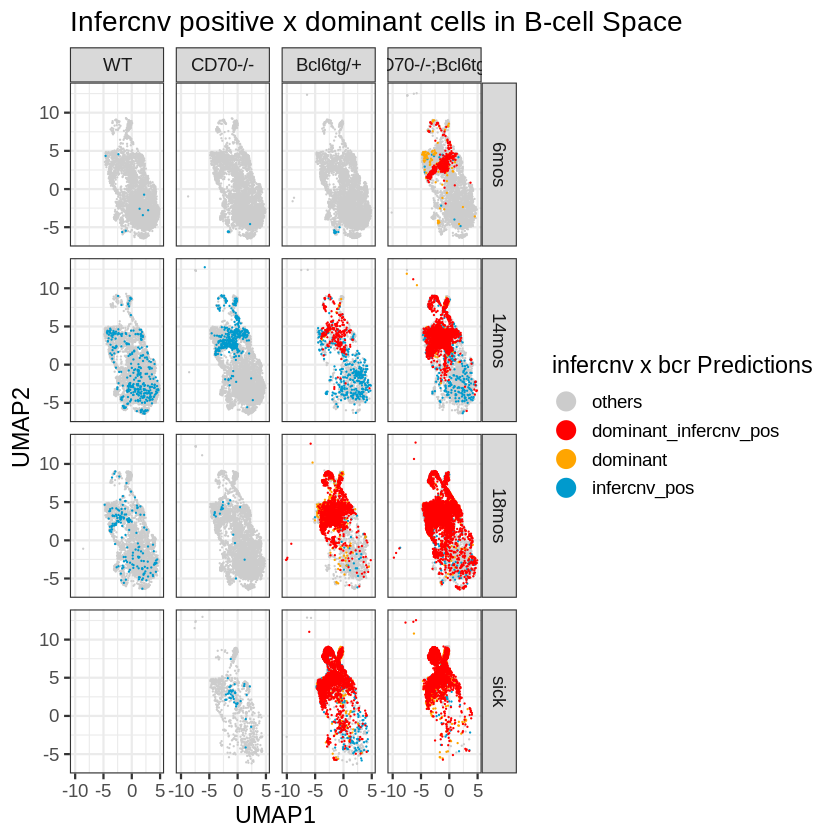

.
             dominant dominant_infercnv_pos          infercnv_pos 
                 2132                 12717                  3110 
               others 
                40715 

.
             dominant dominant_infercnv_pos          infercnv_pos 
                 2132                 12717                  2185 
               others 
                13908 

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "infercnv"


infercnv,dominant,n_cells,n_total_infercnv,percentage
<chr>,<chr>,<int>,<int>,<dbl>
infercnv_neg,dominant,2132,42847,0.04975844
infercnv_neg,non-dominant,40715,42847,0.95024156
infercnv_pos,dominant,12717,15827,0.80350035
infercnv_pos,non-dominant,3110,15827,0.19649965


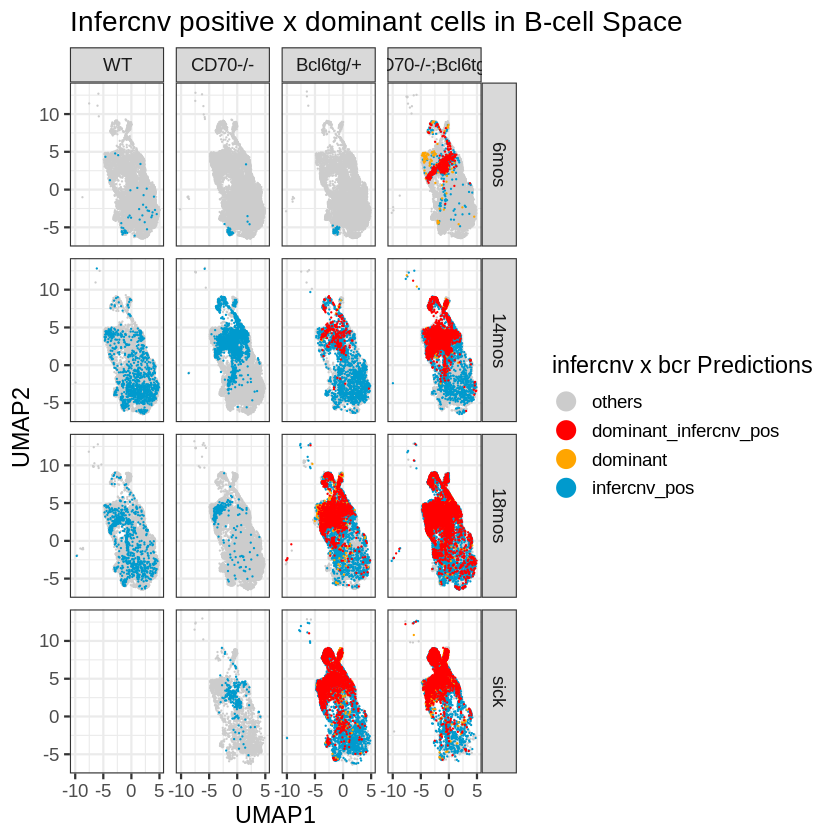

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "dominant"


infercnv,dominant,n_cells,n_total_exanded,percentage
<chr>,<chr>,<int>,<int>,<dbl>
infercnv_neg,dominant,2132,14849,0.14357869
infercnv_neg,non-dominant,40715,43825,0.92903594
infercnv_pos,dominant,12717,14849,0.85642131
infercnv_pos,non-dominant,3110,43825,0.07096406


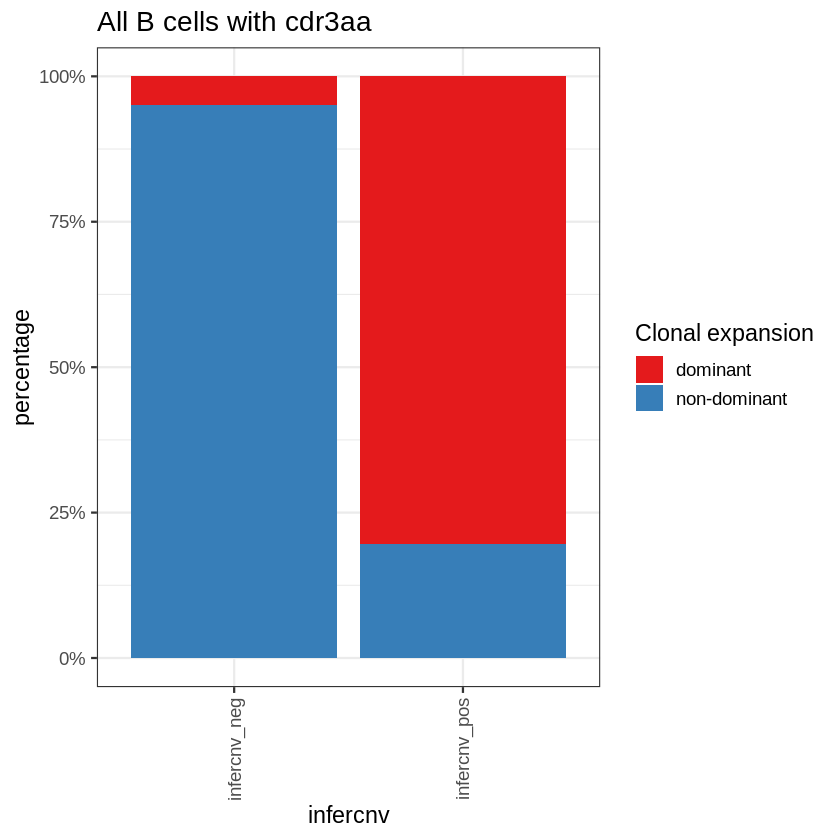

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "infercnv"


infercnv,dominant,n_cells,n_total_infercnv,percentage
<chr>,<chr>,<int>,<int>,<dbl>
infercnv_neg,dominant,2132,16040,0.1329177
infercnv_neg,non-dominant,13908,16040,0.8670823
infercnv_pos,dominant,12717,14902,0.8533754
infercnv_pos,non-dominant,2185,14902,0.1466246


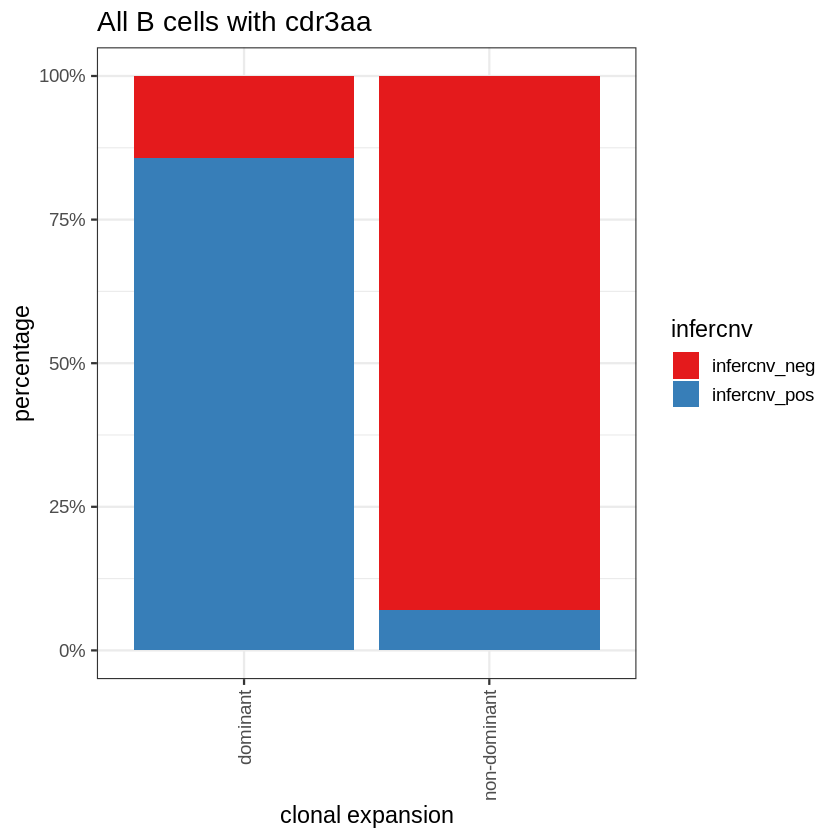

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "dominant"


infercnv,dominant,n_cells,n_total_exanded,percentage
<chr>,<chr>,<int>,<int>,<dbl>
infercnv_neg,dominant,2132,14849,0.1435787
infercnv_neg,non-dominant,13908,16093,0.8642267
infercnv_pos,dominant,12717,14849,0.8564213
infercnv_pos,non-dominant,2185,16093,0.1357733


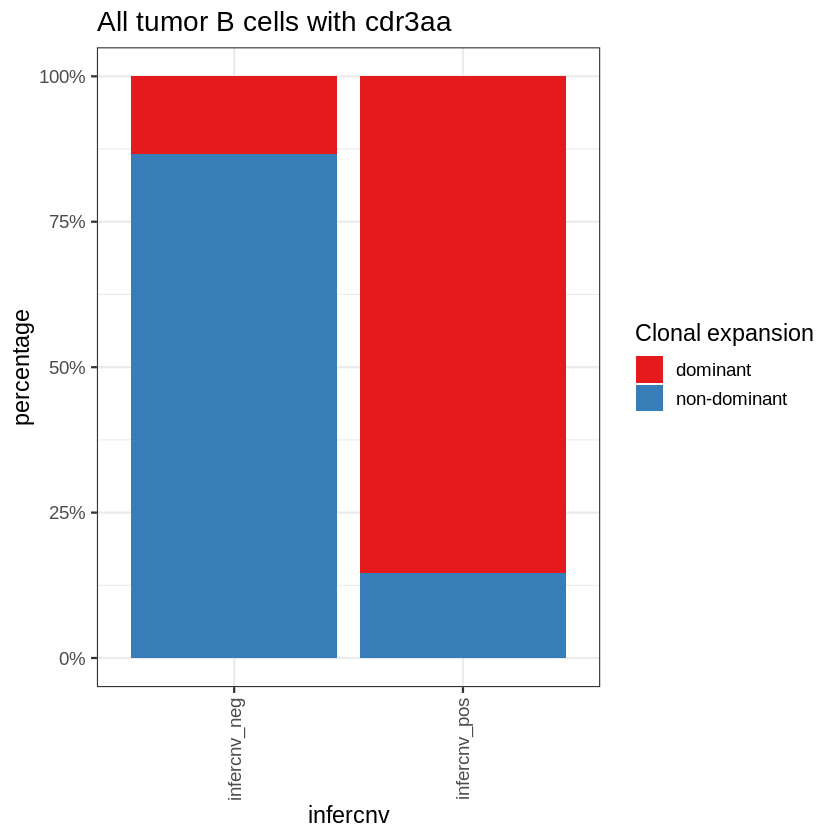

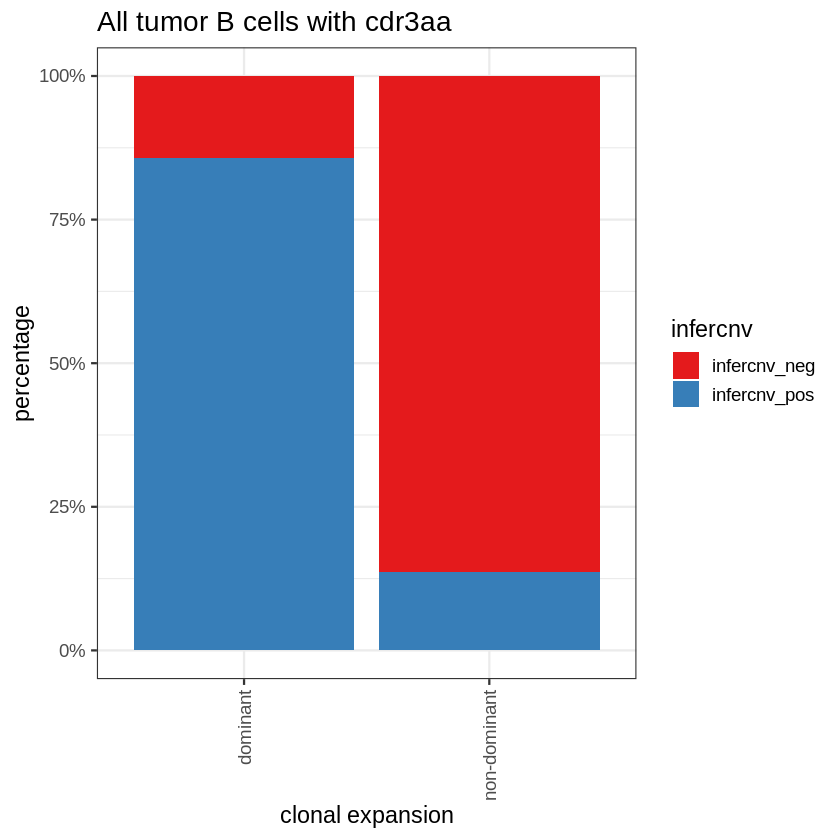

In [85]:
B_cell$dominant = ifelse(Cells(B_cell) %in% dominant_cdr$barcode, "dominant", "non-dominant")

infercnv_pos<- B_cell@meta.data  %>% filter(infercnv == 'infercnv_pos')  %>% rownames()
dominant<- B_cell@meta.data  %>% filter(dominant == 'dominant')  %>% rownames()
dominant_malig<- intersect(infercnv_pos, dominant)
B_cell$dominant_malig = ifelse(Cells(B_cell) %in% infercnv_pos, "infercnv_pos", "others")
B_cell@meta.data[dominant, 'dominant_malig'] = "dominant"
B_cell@meta.data[dominant_malig, 'dominant_malig'] = "dominant_infercnv_pos"

B_cell@meta.data$dominant_malig  %>% table()


colors <- c("grey80", "red", "orange", "deepskyblue3")  
names(colors) <- c("others", "dominant_infercnv_pos", "dominant", "infercnv_pos")  


B_cell@meta.data[cells_with_cdr3, ]  %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(dominant_malig = factor(dominant_malig, levels = c("others",  "infercnv_pos", "dominant", "dominant_infercnv_pos")))  %>% 
    arrange(dominant_malig)  %>%
    ggplot(aes(x = UMAP_1, y = UMAP_2)) +
    geom_point(aes(col = dominant_malig), size = 0.01) +
    labs(x = "UMAP1", y = "UMAP2", title = "Infercnv positive x dominant cells in B-cell Space", col = "infercnv x bcr Predictions") +
    scale_color_manual(values = colors) +
    theme_bw(base_size = 14)  +
    facet_grid(age ~ genotype) +
    guides(color = guide_legend(override.aes = list(size = 5)))

ggsave("./results/figures/12_dominant_infercnv_pos_cells_B_cell_umap_by_genotype_by_age_cdr3aa_only.pdf", width = 10, height = 8)


colors <- c("grey80", "red", "orange", "deepskyblue3")  
names(colors) <- c("others", "dominant_infercnv_pos", "dominant", "infercnv_pos")  


B_cell@meta.data  %>% 
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(dominant_malig = factor(dominant_malig, levels = c("others",  "infercnv_pos", "dominant", "dominant_infercnv_pos")))  %>% 
    arrange(dominant_malig)  %>%
    ggplot(aes(x = UMAP_1, y = UMAP_2)) +
    geom_point(aes(col = dominant_malig), size = 0.01) +
    labs(x = "UMAP1", y = "UMAP2", title = "Infercnv positive x dominant cells in B-cell Space", col = "infercnv x bcr Predictions") +
    scale_color_manual(values = colors) +
    theme_bw(base_size = 14)  +
    facet_grid(age ~ genotype) +
    guides(color = guide_legend(override.aes = list(size = 5)))

ggsave("./results/figures/12_dominant_infercnv_pos_cells_B_cell_umap_by_genotype_by_age.pdf", width = 10, height = 8)


B_cell@meta.data[cells_with_cdr3, "dominant_malig"]  %>% table()


jaccard <- function(a, b) {
    intersection = length(intersect(a, b))
    union = length(a) + length(b) - intersection
    return (intersection/union)
}


infercnv_pos_cdr3aa<- B_cell@meta.data[cells_with_cdr3,]  %>% filter(infercnv == 'infercnv_pos')  %>% rownames()
dominant_cdr3aa<- B_cell@meta.data[cells_with_cdr3,] %>% filter(dominant == 'dominant')  %>% rownames()

jc_all_cells<- jaccard(infercnv_pos_cdr3aa, dominant_cdr3aa)

gg = list(infercnv_pos = infercnv_pos_cdr3aa, dominant_clone = dominant_cdr3aa)
names(gg) = c("Infercnv pos", "Dominant clones")
p = ggvenn(gg, fill_color = c("deepskyblue3", "orange"), show_percentage = FALSE,
           stroke_size = 0.5, set_name_size = 5, text_size = 5, fill_alpha = 0.5,  auto_scale = TRUE)
p = p + labs(title = paste0('jaccard index:', jc_all_cells))
ggsave(plot = p, filename = './results/figures/12_inferCNV_infercnv_pos_dominant_clone_cdr3aa_venn.pdf', width = 6, height = 5)


cells_with_cdr3_tumor<- intersect(cells_with_cdr3, B_cell@meta.data  %>% filter(genotype %in% c("Bcl6tg/+", "CD70-/-;Bcl6tg/+"))  %>% rownames())

B_cell@meta.data[cells_with_cdr3_tumor, "dominant_malig"]  %>% table()


infercnv_pos_cdr3aa<- B_cell@meta.data[cells_with_cdr3_tumor,]  %>% filter(infercnv == 'infercnv_pos')  %>% rownames()
dominant_cdr3aa<- B_cell@meta.data[cells_with_cdr3_tumor,] %>% filter(dominant == 'dominant')  %>% rownames()

jc_tumor_cells<- jaccard(infercnv_pos_cdr3aa, dominant_cdr3aa)

gg = list(infercnv_pos = infercnv_pos_cdr3aa, dominant_clone = dominant_cdr3aa)
names(gg) = c("Infercnv pos", "Dominant clones")
p = ggvenn(gg, fill_color = c("deepskyblue3", "orange"), show_percentage = FALSE,
           stroke_size = 0.5, set_name_size = 5, text_size = 5, fill_alpha = 0.5,  auto_scale = TRUE)
p = p + labs(title = paste0('jaccard index:', jc_tumor_cells))

ggsave(plot = p, filename = './results/figures/12_inferCNV_infercnv_pos_dominant_clone_cdr3aa_venn_tumor.pdf', width = 6, height = 5)


df1<- B_cell@meta.data[cells_with_cdr3,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3,]  %>% group_by(infercnv)  %>% summarise(n_total_infercnv = n()))  %>% 
    mutate(percentage = n_cells/n_total_infercnv)  


df1

write.table(x = df1, file = './data/infercnv/12_percentage_of_dominant_cells_in_infercnv.tsv', quote = FALSE, col.names = T, row.names = F)


df1 %>% 
    ggplot(aes(x = infercnv, y = percentage, fill = dominant))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "infercnv", y = "percentage", title = "All B cells with cdr3aa", fill = "Clonal expansion")


ggsave('./results/figures/12_percentage_of_dominant_cells_in_infercnv.pdf', width = 5, height = 4)

df2<- B_cell@meta.data[cells_with_cdr3,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3,]  %>% group_by(dominant)  %>% summarise(n_total_exanded = n()))  %>% 
    mutate(percentage = n_cells/n_total_exanded)  

df2

write.table(x = df2, file = './data/infercnv/12_percentage_of_infercnv_positive_cells_in_dominant.tsv', quote = FALSE, col.names = T, row.names = F)


df2  %>% 
    ggplot(aes(x = dominant, y = percentage, fill = infercnv))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "clonal expansion", y = "percentage", title = "All B cells with cdr3aa", fill = "infercnv")

ggsave('./results/figures/12_percentage_of_infercnv_positive_cells_in_dominant.pdf', width = 5, height = 4)


df1_tumor<- 
    B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(infercnv)  %>% summarise(n_total_infercnv = n()))  %>% 
    mutate(percentage = n_cells/n_total_infercnv)  

df1_tumor

write.table(x = df1_tumor, file = './data/infercnv/12_percentage_of_dominant_cells_in_infercnv_tumor.tsv', quote = FALSE, col.names = T, row.names = F)


df1_tumor %>% 
    ggplot(aes(x = infercnv, y = percentage, fill = dominant))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "infercnv", y = "percentage", title = "All tumor B cells with cdr3aa", fill = "Clonal expansion")



ggsave('./results/figures/12_percentage_of_dominant_cells_in_infercnv_tumor.pdf', width = 5, height = 4)


df2_tumor<- 
    B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(dominant)  %>% summarise(n_total_exanded = n()))  %>% 
    mutate(percentage = n_cells/n_total_exanded)  

df2_tumor
write.table(x = df2_tumor, file = './data/infercnv/12_percentage_of_infercnv_positive_cells_in_dominant_tumor.tsv', quote = FALSE, col.names = T, row.names = F)


df2_tumor %>% 
    ggplot(aes(x = dominant, y = percentage, fill = infercnv))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "clonal expansion", y = "percentage", title = "All tumor B cells with cdr3aa", fill = "infercnv")

ggsave('./results/figures/12_percentage_of_infercnv_positive_cells_in_dominant_tumor.pdf', width = 5, height = 4)

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 14 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”


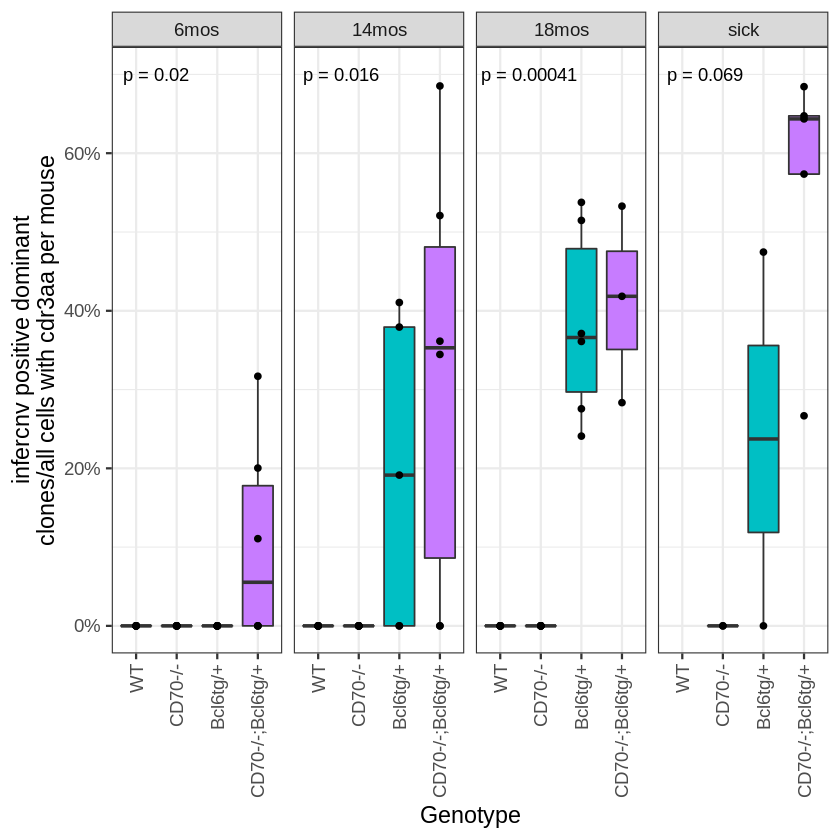

In [54]:
total_cdr3aa_cells_per_mouse =  B_cell@meta.data[cells_with_cdr3,] %>% count(sample_id, genotype, age, name='total_cdr3aa_cells_per_mouse')


total_dominant_infercnv_pos_cells_per_mouse<- B_cell@meta.data[cells_with_cdr3,]  %>% 
    count(sample_id, dominant_malig, name='total_dominant_infercnv_pos_cells_per_mouse')  %>% 
    complete(sample_id, dominant_malig, fill = list(total_dominant_infercnv_pos_cells_per_mouse = 0))  %>% 
    filter(dominant_malig == 'dominant_infercnv_pos')

total_cdr3aa_cells_per_mouse %>%
    left_join(total_dominant_infercnv_pos_cells_per_mouse, by = c("sample_id"))  %>% 
    mutate(percent_dominant_infercnv_pos_cell_per_mouse = total_dominant_infercnv_pos_cells_per_mouse/total_cdr3aa_cells_per_mouse)  %>% 
    mutate(percent_dominant_infercnv_pos_cell_per_mouse = replace_na(percent_dominant_infercnv_pos_cell_per_mouse, 0))  %>% 
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>% 
    ggplot(aes(x=genotype, y = percent_dominant_infercnv_pos_cell_per_mouse)) +
    geom_boxplot(aes(fill = genotype), outlier.colour = "NA") +
    geom_point() +
    scale_y_continuous(labels = scales::percent, limits = c(0,0.7)) +
    stat_compare_means(aes(label = paste0("p = ", ..p.format..)), vjust=0.5) +
    theme_bw(base_size=14)+
    facet_grid(~age, scales = "free_y") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none") +
    labs(x = "Genotype", y = "infercnv positive dominant\nclones/all cells with cdr3aa per mouse")

ggsave('./results/figures/12_inferCNV_percent_dominant_infercnv_pos_cell_per_mouse.pdf', width = 8, height = 4)

### top1 cones

In [87]:
dominant_cdr<- read_excel('../dlbcl_manuscript/data/Barcode_clonotype_dominant.xlsx', sheet = "Sheet1")

.
             dominant dominant_infercnv_pos          infercnv_pos 
                 2132                 12717                 29246 
               others 
               132488 

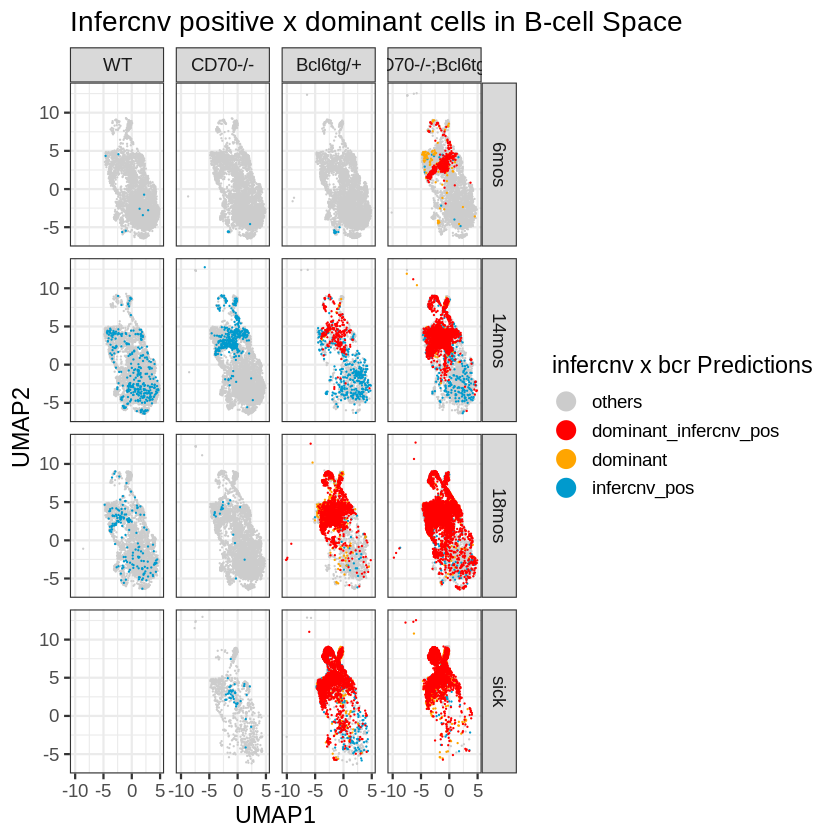

.
             dominant dominant_infercnv_pos          infercnv_pos 
                 2132                 12717                  3110 
               others 
                40715 

.
             dominant dominant_infercnv_pos          infercnv_pos 
                 2132                 12717                  2185 
               others 
                13908 

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "infercnv"


infercnv,dominant,n_cells,n_total_infercnv,percentage
<chr>,<chr>,<int>,<int>,<dbl>
infercnv_neg,dominant,2132,42847,0.04975844
infercnv_neg,non-dominant,40715,42847,0.95024156
infercnv_pos,dominant,12717,15827,0.80350035
infercnv_pos,non-dominant,3110,15827,0.19649965


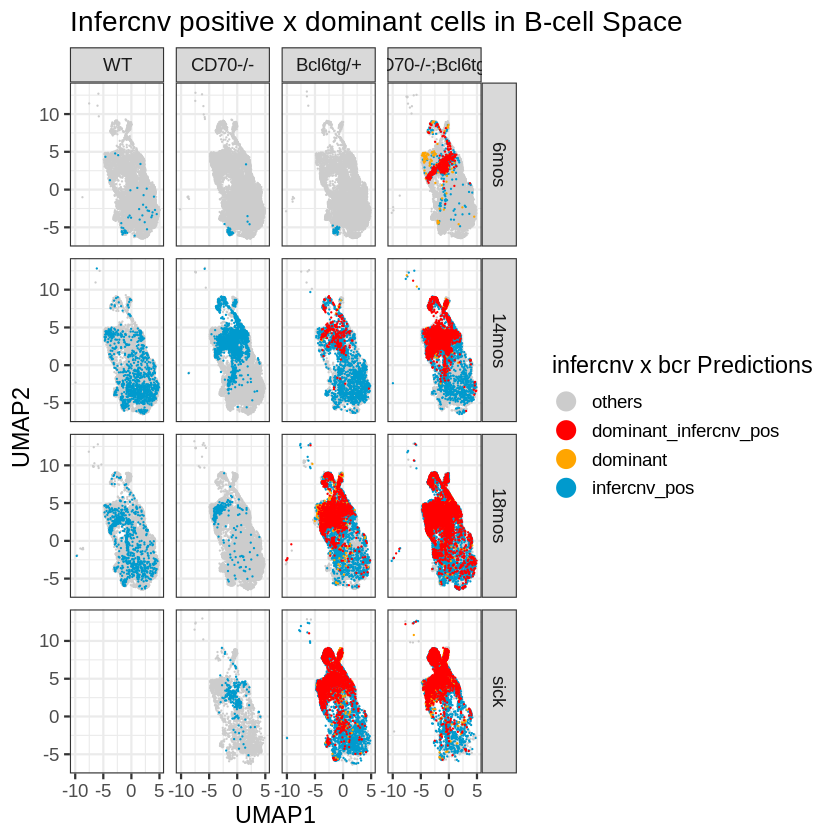

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "dominant"


infercnv,dominant,n_cells,n_total_exanded,percentage
<chr>,<chr>,<int>,<int>,<dbl>
infercnv_neg,dominant,2132,14849,0.14357869
infercnv_neg,non-dominant,40715,43825,0.92903594
infercnv_pos,dominant,12717,14849,0.85642131
infercnv_pos,non-dominant,3110,43825,0.07096406


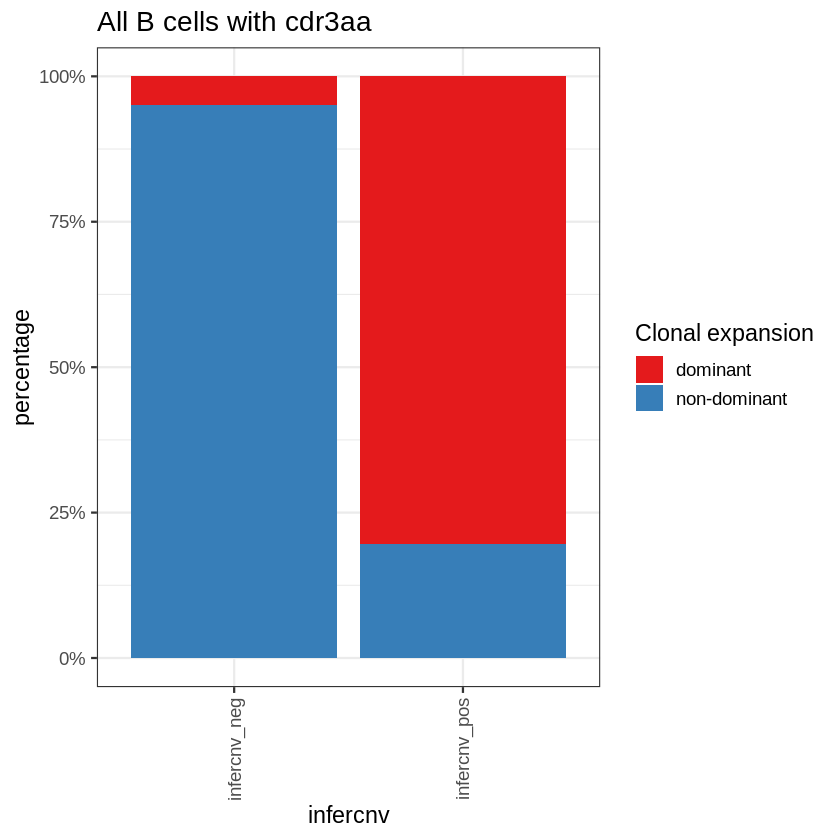

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "infercnv"


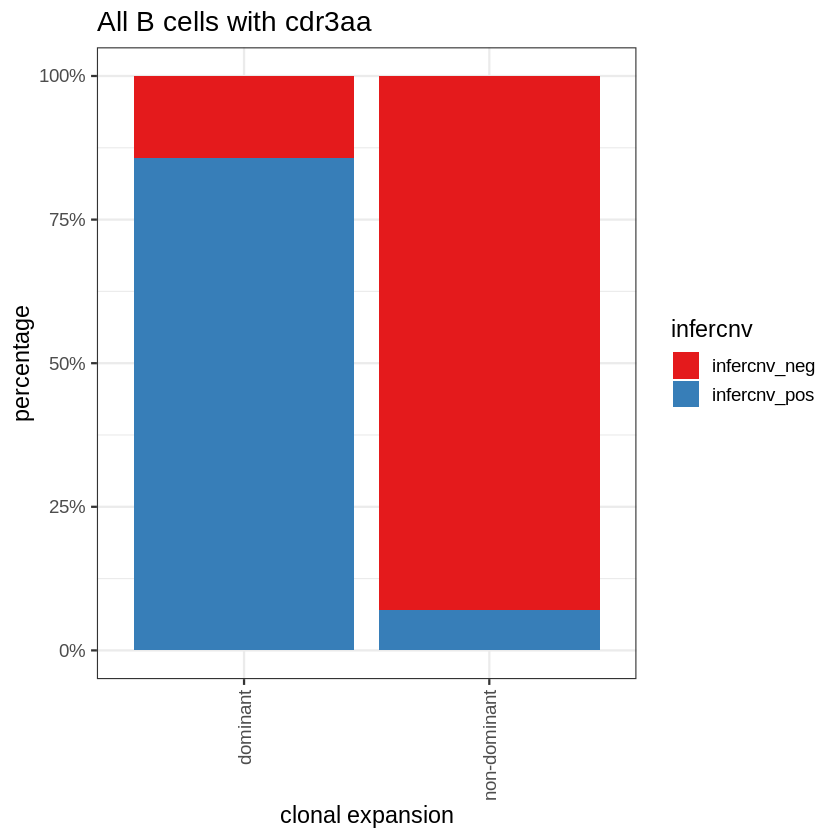

`summarise()` has grouped output by 'infercnv'. You can override using the
`.groups` argument.
Joining, by = "dominant"


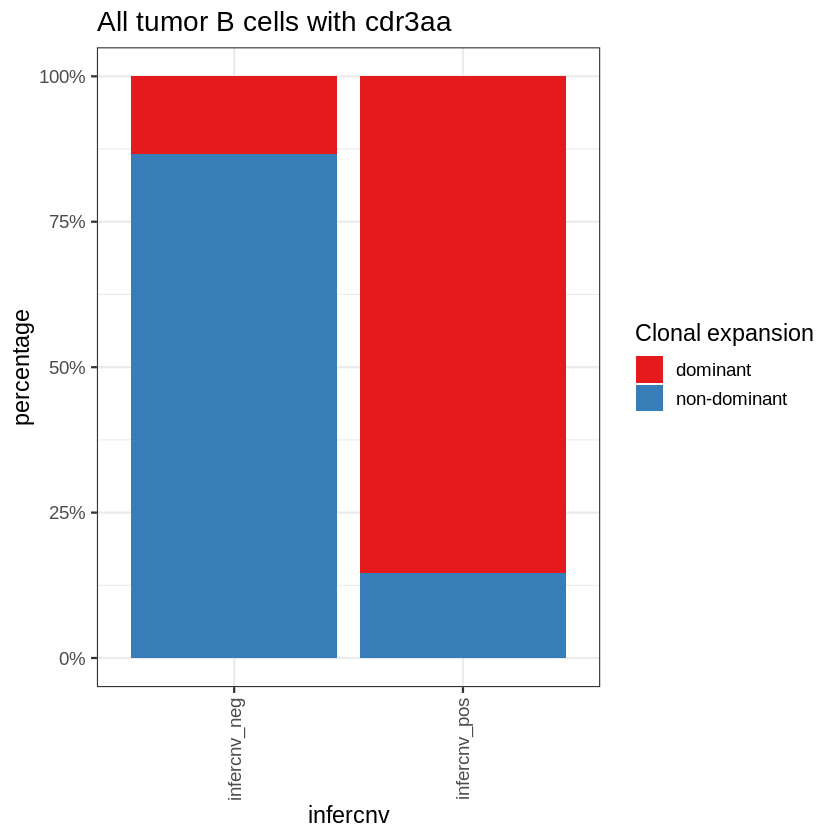

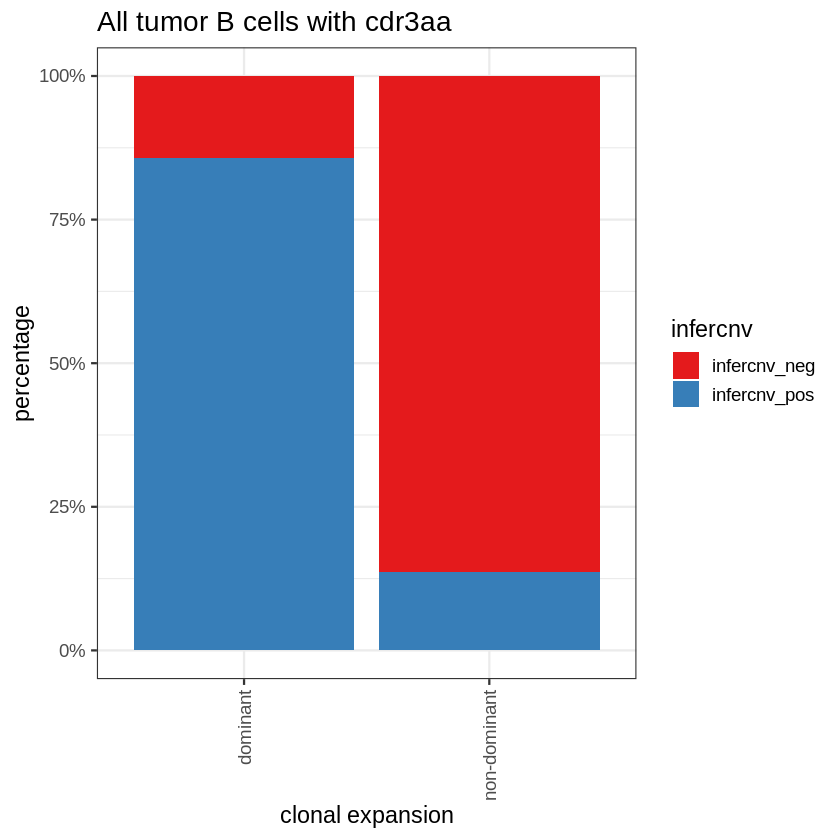

In [86]:
B_cell$dominant = ifelse(Cells(B_cell) %in% dominant_cdr$barcode, "dominant", "non-dominant")


infercnv_pos<- B_cell@meta.data  %>% filter(infercnv == 'infercnv_pos')  %>% rownames()
dominant<- B_cell@meta.data  %>% filter(dominant == 'dominant')  %>% rownames()
dominant_malig<- intersect(infercnv_pos, dominant)
B_cell$dominant_malig = ifelse(Cells(B_cell) %in% infercnv_pos, "infercnv_pos", "others")
B_cell@meta.data[dominant, 'dominant_malig'] = "dominant"
B_cell@meta.data[dominant_malig, 'dominant_malig'] = "dominant_infercnv_pos"

B_cell@meta.data$dominant_malig  %>% table()


colors <- c("grey80", "red", "orange", "deepskyblue3")  
names(colors) <- c("others", "dominant_infercnv_pos", "dominant", "infercnv_pos")  


B_cell@meta.data[cells_with_cdr3, ]  %>%
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(dominant_malig = factor(dominant_malig, levels = c("others",  "infercnv_pos", "dominant", "dominant_infercnv_pos")))  %>% 
    arrange(dominant_malig)  %>%
    ggplot(aes(x = UMAP_1, y = UMAP_2)) +
    geom_point(aes(col = dominant_malig), size = 0.01) +
    labs(x = "UMAP1", y = "UMAP2", title = "Infercnv positive x dominant cells in B-cell Space", col = "infercnv x bcr Predictions") +
    scale_color_manual(values = colors) +
    theme_bw(base_size = 14)  +
    facet_grid(age ~ genotype) +
    guides(color = guide_legend(override.aes = list(size = 5)))

ggsave("./results/figures/12_first_dominant_infercnv_pos_cells_B_cell_umap_by_genotype_by_age_cdr3aa_only.pdf", width = 10, height = 8)


colors <- c("grey80", "red", "orange", "deepskyblue3")  
names(colors) <- c("others", "dominant_infercnv_pos", "dominant", "infercnv_pos")  


B_cell@meta.data  %>% 
    mutate(age = factor(age, levels = c("6mos", "14mos", "18mos", "sick")))  %>% 
    mutate(genotype = factor(genotype, levels = c("WT", "CD70-/-", "Bcl6tg/+", "CD70-/-;Bcl6tg/+")))  %>%
    mutate(dominant_malig = factor(dominant_malig, levels = c("others",  "infercnv_pos", "dominant", "dominant_infercnv_pos")))  %>% 
    arrange(dominant_malig)  %>%
    ggplot(aes(x = UMAP_1, y = UMAP_2)) +
    geom_point(aes(col = dominant_malig), size = 0.01) +
    labs(x = "UMAP1", y = "UMAP2", title = "Infercnv positive x dominant cells in B-cell Space", col = "infercnv x bcr Predictions") +
    scale_color_manual(values = colors) +
    theme_bw(base_size = 14)  +
    facet_grid(age ~ genotype) +
    guides(color = guide_legend(override.aes = list(size = 5)))

ggsave("./results/figures/12_first_dominant_infercnv_pos_cells_B_cell_umap_by_genotype_by_age.pdf", width = 10, height = 8)


B_cell@meta.data[cells_with_cdr3, "dominant_malig"]  %>% table()


jaccard <- function(a, b) {
    intersection = length(intersect(a, b))
    union = length(a) + length(b) - intersection
    return (intersection/union)
}


infercnv_pos_cdr3aa<- B_cell@meta.data[cells_with_cdr3,]  %>% filter(infercnv == 'infercnv_pos')  %>% rownames()
dominant_cdr3aa<- B_cell@meta.data[cells_with_cdr3,] %>% filter(dominant == 'dominant')  %>% rownames()

jc_all_cells<- jaccard(infercnv_pos_cdr3aa, dominant_cdr3aa)

gg = list(infercnv_pos = infercnv_pos_cdr3aa, dominant_clone = dominant_cdr3aa)
names(gg) = c("Infercnv pos", "Dominant clones")
p = ggvenn(gg, fill_color = c("deepskyblue3", "orange"), show_percentage = FALSE,
           stroke_size = 0.5, set_name_size = 5, text_size = 5, fill_alpha = 0.5,  auto_scale = TRUE)
p = p + labs(title = paste0('jaccard index:', jc_all_cells))
ggsave(plot = p, filename = './results/figures/12_inferCNV_infercnv_pos_first_dominant_clone_cdr3aa_venn.pdf', width = 6, height = 5)


cells_with_cdr3_tumor<- intersect(cells_with_cdr3, B_cell@meta.data  %>% filter(genotype %in% c("Bcl6tg/+", "CD70-/-;Bcl6tg/+"))  %>% rownames())

B_cell@meta.data[cells_with_cdr3_tumor, "dominant_malig"]  %>% table()


infercnv_pos_cdr3aa<- B_cell@meta.data[cells_with_cdr3_tumor,]  %>% filter(infercnv == 'infercnv_pos')  %>% rownames()
dominant_cdr3aa<- B_cell@meta.data[cells_with_cdr3_tumor,] %>% filter(dominant == 'dominant')  %>% rownames()

jc_tumor_cells<- jaccard(infercnv_pos_cdr3aa, dominant_cdr3aa)

gg = list(infercnv_pos = infercnv_pos_cdr3aa, dominant_clone = dominant_cdr3aa)
names(gg) = c("Infercnv pos", "Dominant clones")
p = ggvenn(gg, fill_color = c("deepskyblue3", "orange"), show_percentage = FALSE,
           stroke_size = 0.5, set_name_size = 5, text_size = 5, fill_alpha = 0.5,  auto_scale = TRUE)
p = p + labs(title = paste0('jaccard index:', jc_tumor_cells))

ggsave(plot = p, filename = './results/figures/12_inferCNV_infercnv_pos_first_dominant_clone_cdr3aa_venn_tumor.pdf', width = 6, height = 5)


df1<- B_cell@meta.data[cells_with_cdr3,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3,]  %>% group_by(infercnv)  %>% summarise(n_total_infercnv = n()))  %>% 
    mutate(percentage = n_cells/n_total_infercnv)

df1
write.table(x = df1, file = './data/infercnv/12_percentage_of_first_dominant_cells_in_infercnv.tsv', quote = FALSE, col.names = T, row.names = F)

df1  %>%  
    ggplot(aes(x = infercnv, y = percentage, fill = dominant))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "infercnv", y = "percentage", title = "All B cells with cdr3aa", fill = "Clonal expansion")

ggsave('./results/figures/12_percentage_of_first_dominant_cells_in_infercnv.pdf', width = 5, height = 4)

df2<- 
    B_cell@meta.data[cells_with_cdr3,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3,]  %>% group_by(dominant)  %>% summarise(n_total_exanded = n()))  %>% 
    mutate(percentage = n_cells/n_total_exanded)
df2

write.table(x = df2, file = './data/infercnv/12_percentage_of_infercnv_positive_cells_in_first_dominant.tsv', quote = FALSE, col.names = T, row.names = F)


df2 %>% 
    ggplot(aes(x = dominant, y = percentage, fill = infercnv))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "clonal expansion", y = "percentage", title = "All B cells with cdr3aa", fill = "infercnv")

ggsave('./results/figures/12_percentage_of_infercnv_positive_cells_in_first_dominant.pdf', width = 5, height = 4)


df1_tumor<- 
    B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(infercnv)  %>% summarise(n_total_infercnv = n()))  %>% 
    mutate(percentage = n_cells/n_total_infercnv)  

df1_tumor
write.table(x = df1_tumor, file = './data/infercnv/12_percentage_of_first_dominant_cells_in_infercnv_tumor.tsv', quote = FALSE, col.names = T, row.names = F)


df1_tumor %>% 
    ggplot(aes(x = infercnv, y = percentage, fill = dominant))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "infercnv", y = "percentage", title = "All tumor B cells with cdr3aa", fill = "Clonal expansion")

ggsave('./results/figures/12_percentage_of_first_dominant_cells_in_infercnv_tumor.pdf', width = 5, height = 4)


df2_tumor <- 
    B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(infercnv, dominant)  %>% 
    summarise(n_cells = n())  %>%  
    left_join(B_cell@meta.data[cells_with_cdr3_tumor,]  %>% group_by(dominant)  %>% summarise(n_total_exanded = n()))  %>% 
    mutate(percentage = n_cells/n_total_exanded)

df2_tumor
write.table(x = df2_tumor, file = './data/infercnv/12_percentage_of_infercnv_positive_cells_in_first_dominant_tumor.tsv', quote = FALSE, col.names = T, row.names = F)


df2_tumor  %>%     
    ggplot(aes(x = dominant, y = percentage, fill = infercnv))  +
    geom_bar(stat = "identity", position = 'stack') +
    theme_bw(14) +
    scale_fill_brewer(palette = "Set1") +
    scale_y_continuous(labels = scales::percent, limits = c(0, 1)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    labs(x = "clonal expansion", y = "percentage", title = "All tumor B cells with cdr3aa", fill = "infercnv")

ggsave('./results/figures/12_percentage_of_infercnv_positive_cells_in_first_dominant_tumor.pdf', width = 5, height = 4)